<h1> Naive Bayes </h1>

In [1]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [6]:
import pandas as pd


dataset = pd.DataFrame({'weather':weather,'temp':temp,'play':play})


In [7]:
dataset.head(5)

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [11]:
from sklearn import preprocessing 

#create labelEcoder
le = preprocessing.LabelEncoder()

# converting string labels into numbers.
weather_encoded = le.fit_transform(dataset['weather'])
temp_encoded = le.fit_transform(dataset['temp'])
play_encoded = le.fit_transform(dataset['play'])

weather_encoded,play_encoded,temp_encoded

(array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2]))

In [23]:
#play - classs


features = [weather_encoded,temp_encoded]
label = play

features

[array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1]),
 array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])]

In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(np.array(features).reshape(14,2),play_encoded)

predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
"Predicted Value:", predicted

if predicted == 1:
    print('yes')
else:
    print('no')



yes


Naive Bayes with Multiple LabelsTill now you have learned Naive Bayes
classification with binary labels. Now you will learn about multiple class
classification in Naive Bayes. Which is known as multinomial Naive Bayes classification.
For example, if you want to classify a news article about
technology, entertainment, politics, or sports

In [31]:
#using wine dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split


#Load dataset
wine = datasets.load_wine()

#splitting dataset

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109)
# 70% training and 30% test




In [32]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


Zero Probability Problem
Suppose there is no tuple for a risky loan in the dataset, in this scenario, the posterior probability will be zero, and the model is unable to make a prediction. This problem is known as Zero Probability because the occurrence of the particular class is zero.

The solution for such an issue is the Laplacian correction or Laplace Transformation. Laplacian correction is one of the smoothing techniques. Here, you can assume that the dataset is large enough that adding one row of each class will not make a difference in the estimated probability. This will overcome the issue of probability values to zero.

For Example: Suppose that for the class loan risky, there are 1000 training tuples in the database. In this database, income column has 0 tuples for low income, 990 tuples for medium income, and 10 tuples for high income. The probabilities of these events, without the Laplacian correction, are 0, 0.990 (from 990/1000), and 0.010 (from 10/1000)

Now, apply Laplacian correction on the given dataset. Let's add 1 more tuple for each income-value pair. The probabilities of these events:


1/1003 = 0.001 - income

991(instead of 990)/1003 = 0.988 - medium income

11/1003 = 0.011 - high income



In [46]:
print('discription:',gnb.classes_,gnb.class_count_,gnb.priors,gnb.score(X_train,y_train),gnb.class_prior_)

discription: [0 1 2] [38. 52. 34.] None 0.9919354838709677 [0.30645161 0.41935484 0.27419355]


If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$


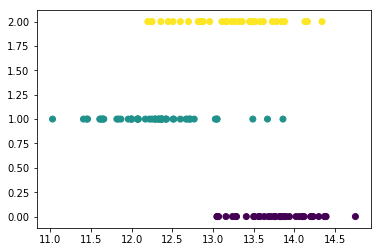

In [59]:
import matplotlib.pyplot as plt


plt.scatter(X_train[:,0],y_train , c = y_train,cmap = 'viridis')

In [70]:
rng = np.random.RandomState(0)
Xnew = rng.rand(2000, 13) + X_train[3]

y_new = gnb.predict(Xnew)




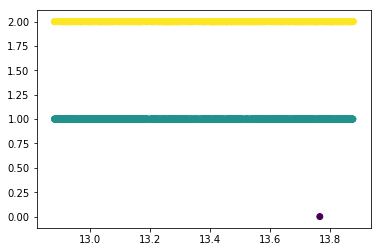

In [75]:
# plt.scatter(X_train[:,0],y_train,c = y_train,cmap = 'viridis')
plt.scatter(Xnew[:,0],y_new,c = y_new,cmap = 'viridis')

In [81]:

#predicts the posterior probability of the classes 
np.round(gnb.predict_proba(Xnew)[:5])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])